In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv('amazon.csv',encoding='iso-8859-1',parse_dates=["date"])

# Display Top 5 Rows of The Dataset

In [12]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Check Last 5 Rows

In [19]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# Find Shape of Our Dataset

In [22]:
data.shape

(6454, 5)

In [26]:
print('number of rows is',data.shape[0])
print('number of columns is',data.shape[1])

number of rows is 6454
number of columns is 5


# Getting Information About Our Dataset 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# Check For Duplicate Data and Drop Them

In [48]:
dup_data=data.duplicated().any()
print('is there any duplicated value in our data?',dup_data)

is there any duplicated value in our data? True


In [52]:
data=data.drop_duplicates()

# Check Null Values In The Dataset

In [57]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [71]:
is_null=data.isnull().sum().any()
print('is there null value in our data?',is_null)

is there null value in our data? False


# Get Overall Statistics About The Dataframe

In [76]:
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


# Rename Month Names To English

In [91]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [87]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [254]:
data.loc['months_in_Eng']=data['month'].map({'Janeiro':'jan',
                                'Fevereiro':'fabruary',
                                'Março':'march',
                                'abril':'april',
                                'Maio':'may',
                                'Junho':'june',
                                'Julho':'july',
                                'Agosto':'august',
                                'Setembro':'september',
                                'Outubro':'october',
                                'Novembro':'november',
                                'Dezembro':'december'})
                                
                                

In [147]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'months_in_Eng'], dtype='object')

# In Which Month Maximum Number of Forest Fires Were Reported?

In [158]:
data1=data.groupby('months_in_Eng')['number'].sum().reset_index()

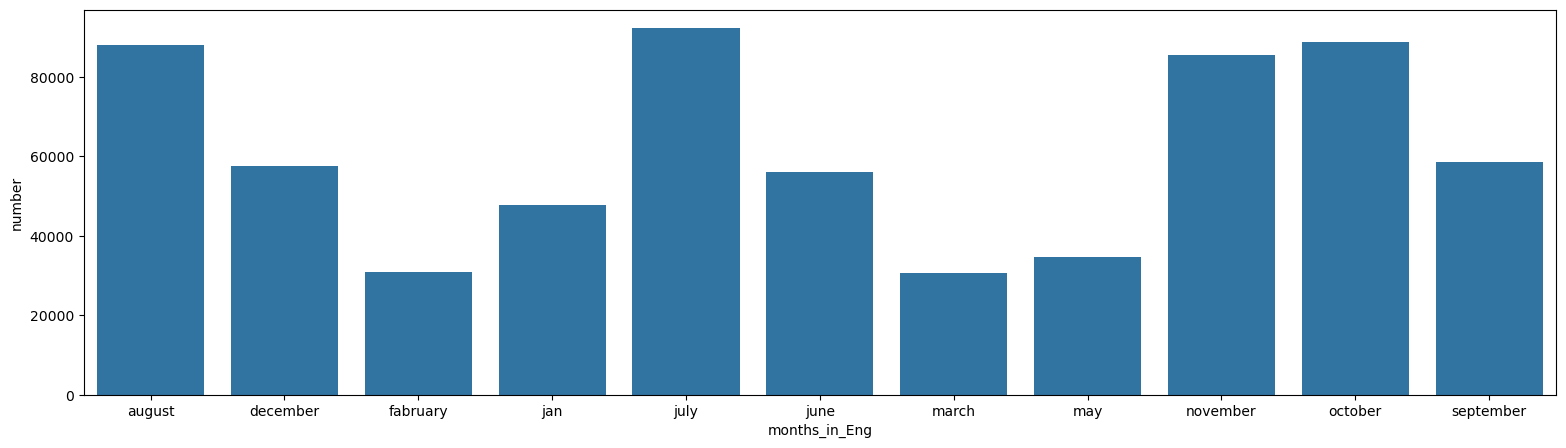

In [256]:
plt.figure(figsize=(19,5))
sns.barplot(x='months_in_Eng',y='number',data=data1)
plt.show()

In [174]:
# july is the highest month

#  In Which Year Maximum Number of Forest Fires Was Reported?

In [183]:
data2=data.groupby('year')['number'].sum().reset_index()

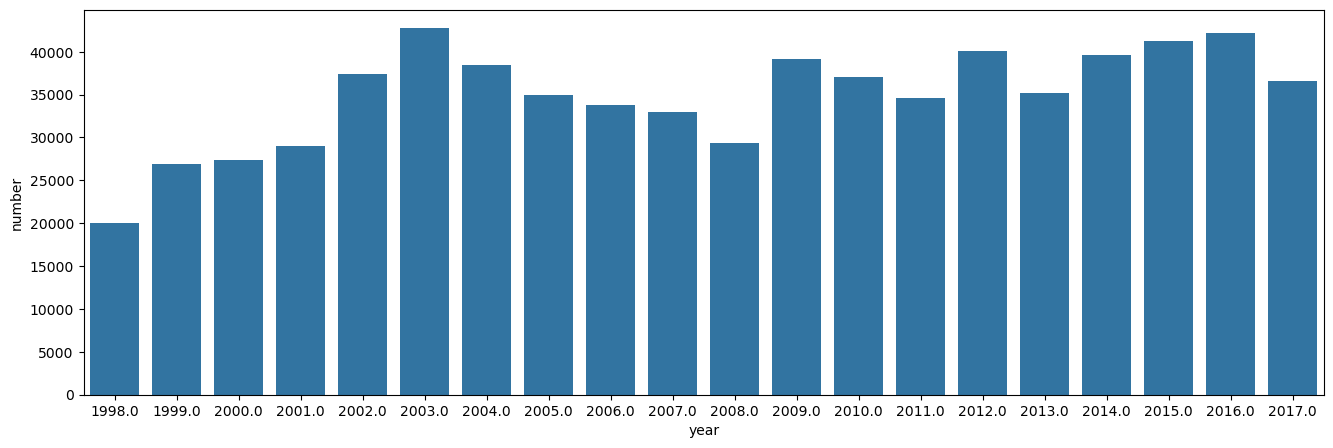

In [185]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)
plt.show()

In [187]:
# 2003 is the highest year

# In Which State Maximum Number of Forest Fires Was Reported?

In [192]:
data3=data.groupby('state')['number'].sum().reset_index()

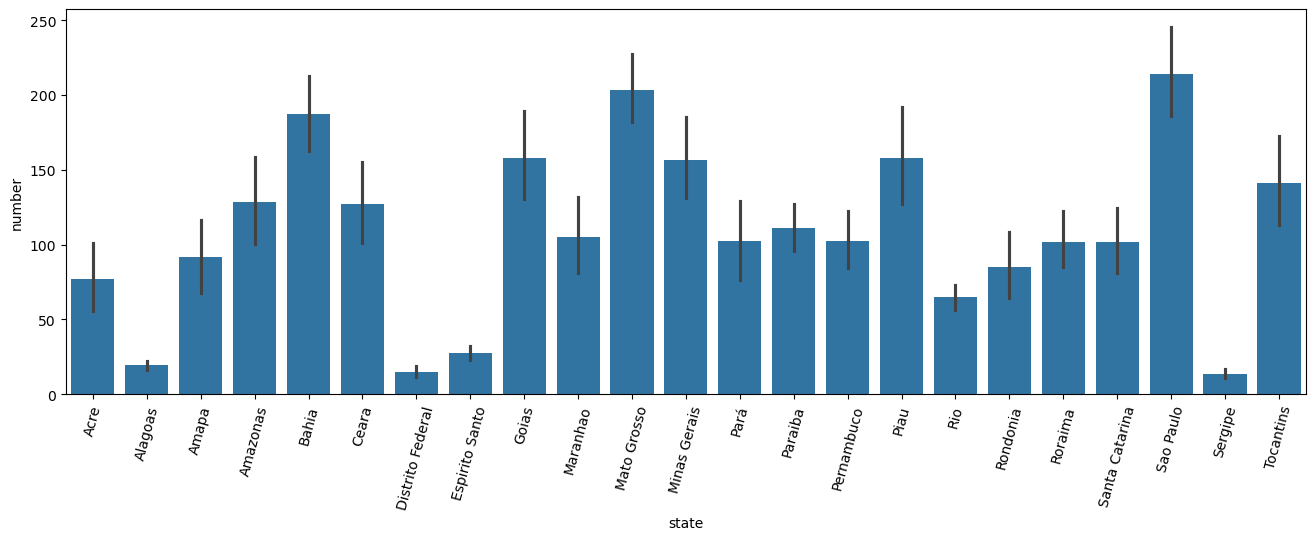

In [196]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data)
plt.xticks(rotation=75)
plt.show()

In [198]:
# sao paulo is the highest state

In [200]:
#  Find Total Number of Fires Were Reported In Amazonas

In [206]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

In [208]:
# Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [220]:
data4=data[data['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum().reset_index()

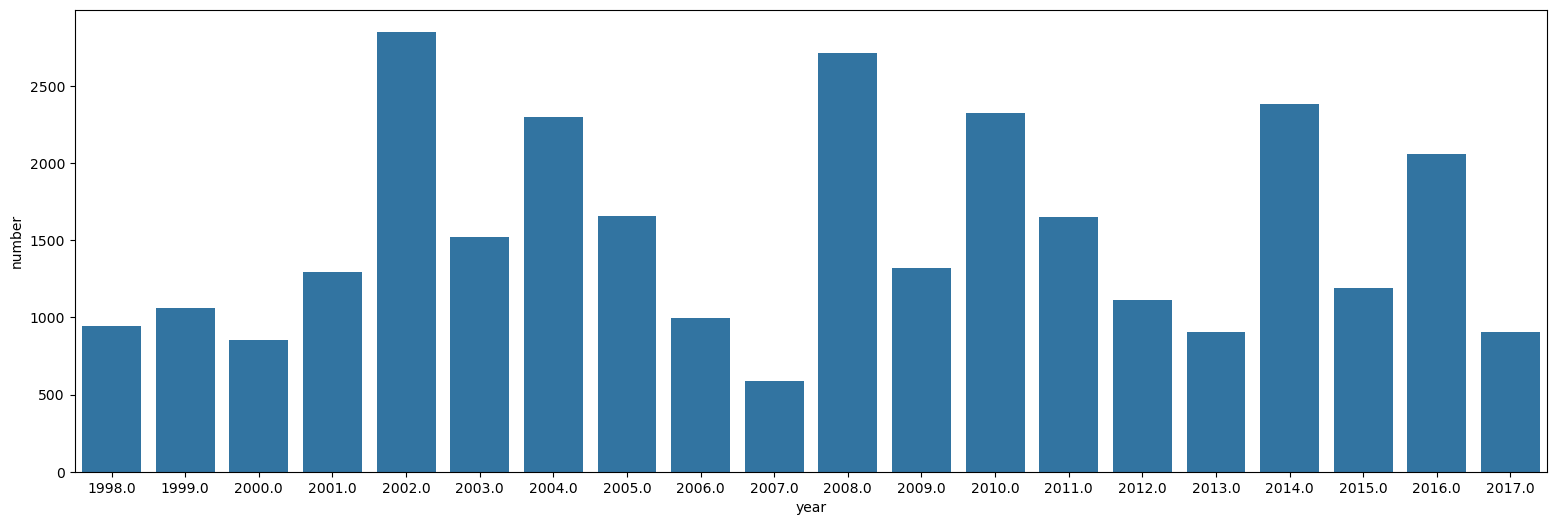

In [270]:
plt.figure(figsize=(19,6))
sns.barplot(x='year',y='number',data=data5)
plt.show()

# Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [274]:
n_fire=data[data['year']==2015]
data6=n_fire.groupby('months_in_Eng')['number'].sum().reset_index()
data6

,months_in_Eng,number
0,august,4363.125
1,december,4088.522
2,fabruary,2309.000
3,jan,4635.000
4,july,4364.392
5,june,3260.552
6,march,2202.000
7,may,2384.000
8,november,4034.518
9,october,4499.525


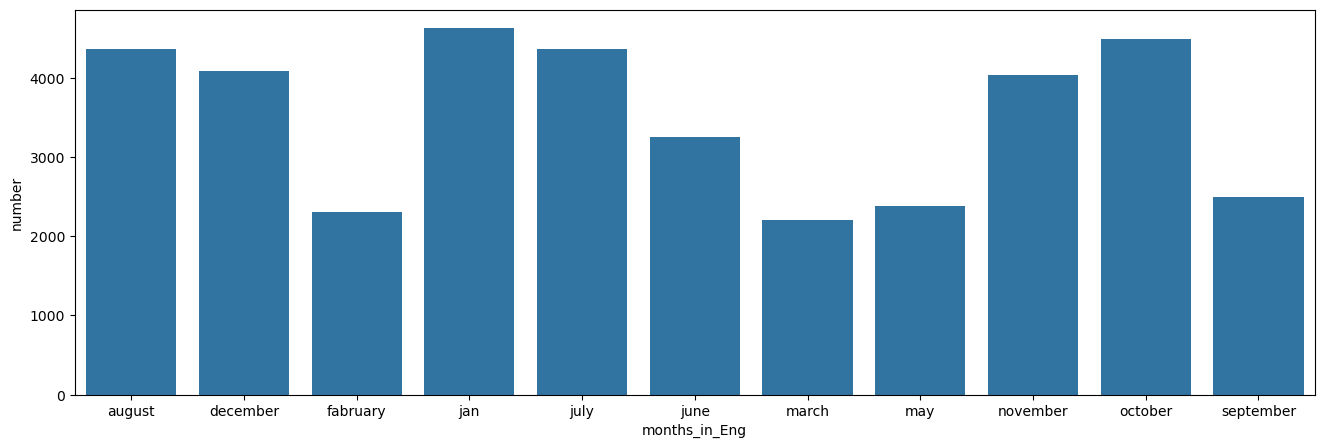

In [276]:
plt.figure(figsize=(16,5))
sns.barplot(x='months_in_Eng',y='number',data=data6)
plt.show()

#  Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [285]:
data7=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


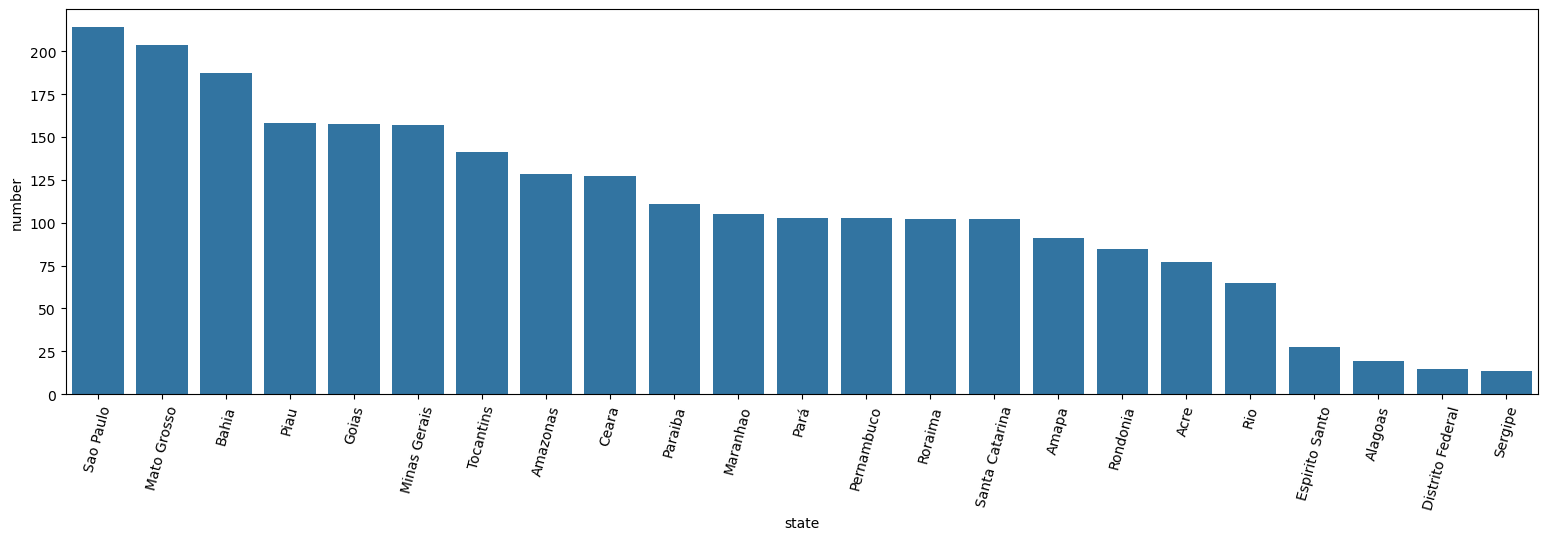

In [291]:
plt.figure(figsize=(19,5))
sns.barplot(x='state',y='number',data=data7)
plt.xticks(rotation=75)
plt.show()

# To Find The State Names Where Fires Were Reported In 'dec' Month

In [308]:
data[data['months_in_Eng']=='december']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)